In [3]:
import pandas as pd
import os

# This prints where Python is looking, to help debug
print("Current working directory:", os.getcwd())

# Correct path to go up one level from 'notebooks' to find 'data'
df = pd.read_csv('../data/raw_analyst_ratings.csv')

# Convert date
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Show first few rows to confirm it worked
df.head()

Current working directory: d:\10academy\phase0\nova-financial-news_week1\notebooks


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


## Headline Length: Calculate the length of every headline.

In [4]:
df['headline_len'] = df['headline'].apply(len)
df['headline_len'].describe() # Get mean, min, max

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_len, dtype: float64

## Article Counts: Count articles per publisher.

In [5]:
publisher_counts = df['publisher'].value_counts()
print(publisher_counts.head(10))

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


##  Time Series Analysis
Frequency Plot: Group by date to see how many articles are published per day/month.

<Axes: xlabel='date'>

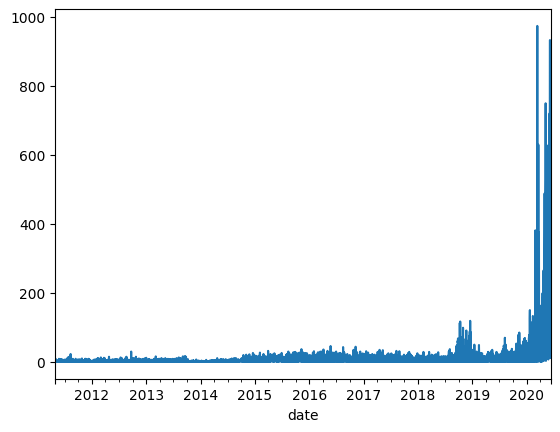

In [7]:
daily_counts = df.set_index('date').resample('D').count()
daily_counts['headline'].plot()

## Publishing Times: Extract the hour from the date and see when news breaks.

<Axes: xlabel='hour'>

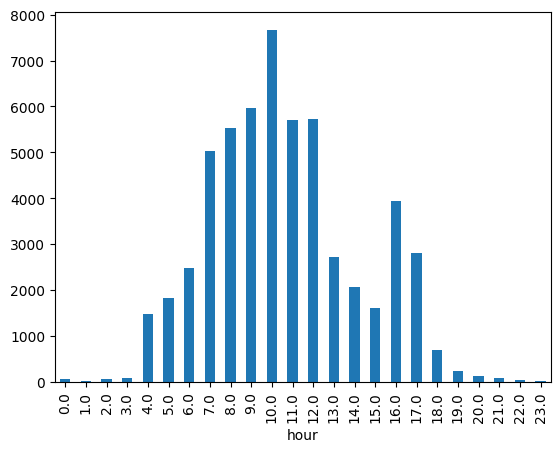

In [6]:
df['hour'] = df['date'].dt.hour
df['hour'].value_counts().sort_index().plot(kind='bar')

## NLP & Topic Modeling
Pre-processing: Lowercase text, remove stopwords (using nltk).
Keyword Extraction:

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words='english', max_features=20)
X = vec.fit_transform(df['headline'])
print(vec.get_feature_names_out()) # Top keywords

['announces' 'benzinga' 'buy' 'downgrades' 'earnings' 'eps' 'est' 'market'
 'mid' 'price' 'pt' 'raises' 'reports' 'sales' 'shares' 'stocks' 'trading'
 'update' 'vs' 'week']


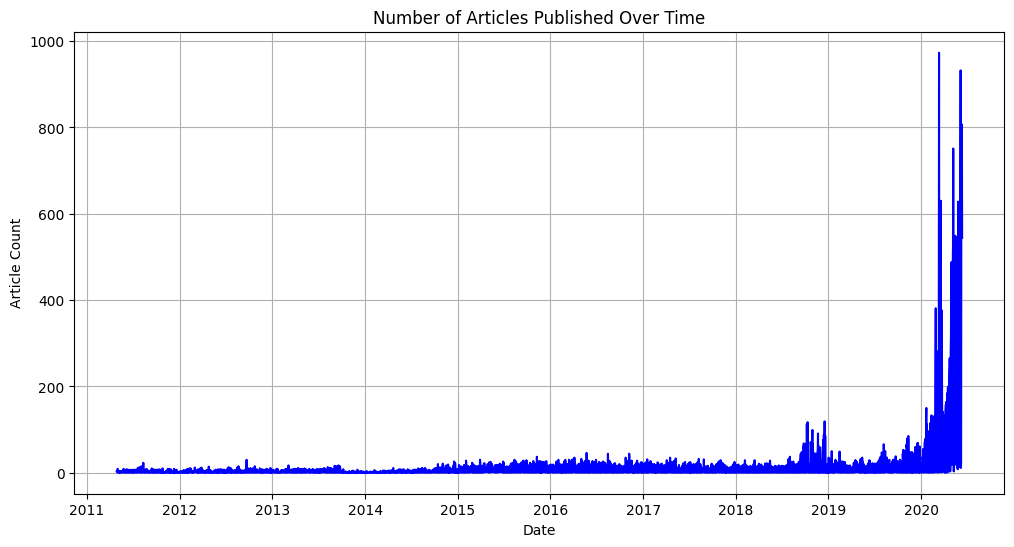

In [5]:
import matplotlib.pyplot as plt

# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'], utc=True)

# Count articles per day
daily_counts = df.resample('D', on='date').count()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts['headline'], color='blue')
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Article Count')
plt.grid(True)
plt.show()

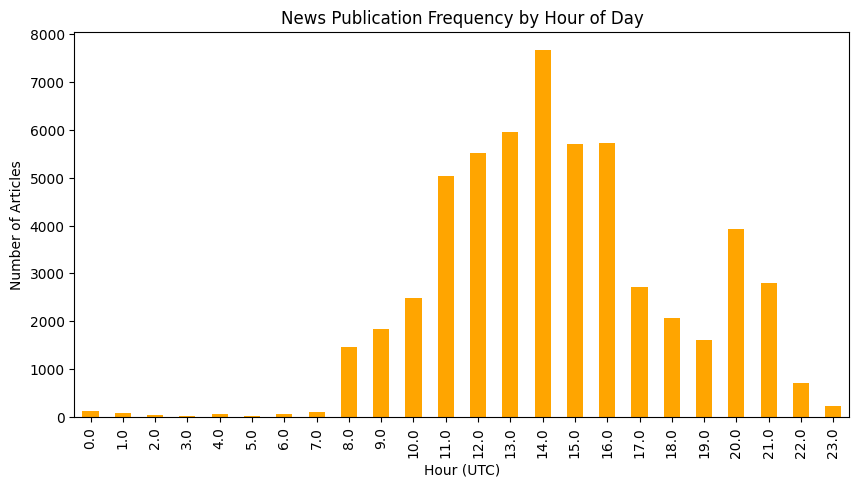

In [6]:
# Extract hour
df['hour'] = df['date'].dt.hour

# Plot
plt.figure(figsize=(10, 5))
df['hour'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('News Publication Frequency by Hour of Day')
plt.xlabel('Hour (UTC)')
plt.ylabel('Number of Articles')
plt.show()

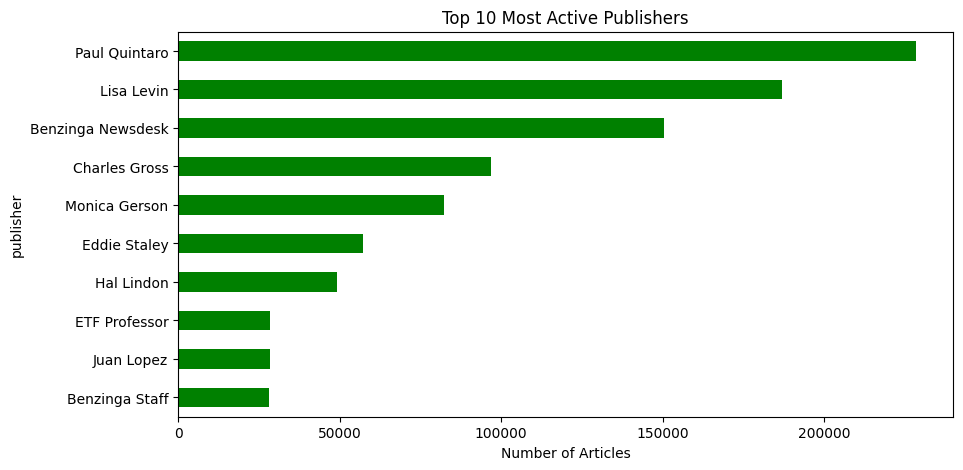

In [7]:
# Count top 10 publishers
publisher_counts = df['publisher'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
publisher_counts.plot(kind='barh', color='green')
plt.title('Top 10 Most Active Publishers')
plt.xlabel('Number of Articles')
plt.gca().invert_yaxis() # Highest at top
plt.show()